# Bayes Decision Rule
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the calculation of **likelihood** of each features given particular class 
- implement the calculation of **posterior** of each class given particular feature
- implement the calculation of **minimal total risk** of bayes decision rule

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
data = sio.loadmat('data.mat')
x1_train, x1_test, x2_train, x2_test = data['x1_train'], data['x1_test'], data['x2_train'], data['x2_test']
all_x = np.concatenate([x1_train, x1_test, x2_train, x2_test], 1)
data_range = [np.min(all_x), np.max(all_x)]

In [3]:
from get_x_distribution import get_x_distribution

train_x = get_x_distribution(x1_train, x2_train, data_range)
test_x = get_x_distribution(x1_test, x2_test, data_range)

## Part 1 likelihood
Your code for this section will be written inside **bayes_decision_rule/likehood.py**. 

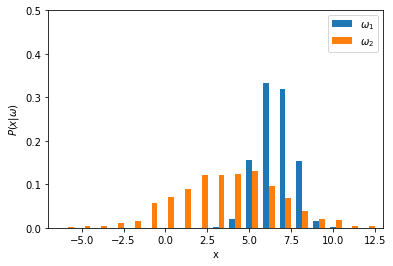

In [4]:
from likelihood import likelihood

l = likelihood(train_x)
width = 0.35
p1 = plt.bar(np.arange(data_range[0], data_range[1] + 1), l.T[:,0], width)
p2 = plt.bar(np.arange(data_range[0], data_range[1] + 1) + width, l.T[:,1], width)
plt.xlabel('x')
plt.ylabel('$P(x|\omega)$')
plt.legend((p1[0], p2[0]), ('$\omega_1$', '$\omega_2$'))
plt.axis([data_range[0] - 1, data_range[1] + 1, 0, 0.5])
plt.show()

In [5]:
#TODO
#compute the number of all the misclassified x using maximum likelihood decision rule

# begin answer
misclassfied = 0
C, N = test_x.shape
for c in range(C):
    # in each class of test data
    for n in range(N):
        # for each n s.t. x = n
        if(l[c][n] < l[1-c][n]):
            # misclassified according to ML dicision rule
            misclassfied += test_x[c][n]
print(misclassfied/np.sum(test_x))
# end answer


0.21333333333333335


## Part 2 posterior
Your code for this section will be written inside **bayes_decision_rule/posterior.py**. 

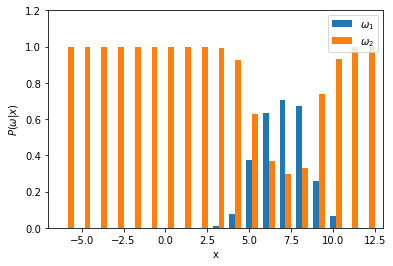

In [6]:
from posterior import posterior

p = posterior(train_x)
width = 0.35
p1 = plt.bar(np.arange(data_range[0], data_range[1] + 1), p.T[:,0], width)
p2 = plt.bar(np.arange(data_range[0], data_range[1] + 1) + width, p.T[:,1], width)
plt.xlabel('x')
plt.ylabel('$P(\omega|x)$')
plt.legend((p1[0], p2[0]), ('$\omega_1$', '$\omega_2$'))
plt.axis([data_range[0] - 1, data_range[1] + 1, 0, 1.2])
plt.show()

In [7]:
#TODO
#compute the number of all the misclassified x using optimal bayes decision rule

# begin answer
misclassfied = 0
C, N = test_x.shape
for c in range(C):
    # in each class of test data
    for n in range(N):
        # for each n s.t. x = n
        if(p[c][n] < p[1-c][n]):
            # misclassified according to ML dicision rule
            misclassfied += test_x[c][n]
print(misclassfied/np.sum(test_x))
# end answer


0.15666666666666668


## Part 3 risk


In [21]:
risk = np.array([[0, 1], [2, 0]])
#TODO
#get the minimal risk using optimal bayes decision rule and risk weights

# begin answer
# recalculate prior, likelihood, posterior and p(x) from test data and train data
x = test_x + train_x
C, N = x.shape
prior = np.array([np.sum(x[0,:]), np.sum(x[1,:])])/np.sum(x)
l = likelihood(x)
p = posterior(x)
px = np.zeros(N)
for xi in range(N):
    for c in range(C):
        px[xi] += l[c][xi]*prior[c]

minRisk = 0
for xi in range(N):
    ni, nj = risk.shape
    riskList = np.zeros(ni)
    for i in range(ni):
        for j in range(nj):
            riskList[i] += risk[i][j]*p[j][xi]
    minRisk += np.min(riskList)*px[xi]
print(minRisk)
# end answer

0.24266666666666667
